In [1]:
import openslide

def get_wsi_metadata(wsi_file_path):
    """
    Loads a Whole Slide Image (WSI) file and extracts the pixel size metadata.
    
    Args:
        wsi_file_path (str): The file path to the WSI file.
        
    Returns:
        A tuple containing the pixel size in microns per pixel for the X and Y dimensions.
    """
    with openslide.open_slide(wsi_file_path) as slide:
        # Get the pixel size (microns per pixel) in the X and Y dimensions
        try:
            mpp_x = float(slide.properties[openslide.PROPERTY_NAME_MPP_X])
            mpp_y = float(slide.properties[openslide.PROPERTY_NAME_MPP_Y])
        except (KeyError, ValueError):
            # If the metadata is not available, return None
            mpp_x = None
            mpp_y = None
        
        return mpp_x, mpp_y

# Example usage
wsi_file_path = "//tank/WSI_data/Ovarian_WSIs/BRCA_blind_test/slides/slide-2023-08-28T17-55-15-R3-S5.mrxs"
mpp_x, mpp_y = get_wsi_metadata(wsi_file_path)

if mpp_x is not None and mpp_y is not None:
    print(f"Pixel size (microns per pixel): X = {mpp_x:.2f}, Y = {mpp_y:.2f}")
else:
    print("Unable to retrieve pixel size metadata.")

Pixel size (microns per pixel): X = 0.24, Y = 0.24


In [7]:

# Example usage
wsi_file_path = "//tank/WSI_data/Ovarian_WSIs/MSK-IMPACT/hne/mskcc/2499641.svs"
mpp_x, mpp_y = get_wsi_metadata(wsi_file_path)

if mpp_x is not None and mpp_y is not None:
    print(f"Pixel size (microns per pixel): X = {mpp_x:.2f}, Y = {mpp_y:.2f}")
else:
    print("Unable to retrieve pixel size metadata.")

Pixel size (microns per pixel): X = 0.50, Y = 0.50


In [3]:
# Example usage
wsi_file_path = "//tank/WSI_data/Ovarian_WSIs/TCGA-OV/FFPE_slides/TCGA-25-1316-01Z-00-DX1.A9B7F47C-5BDC-4B7D-BC9F-C4C9DBA663C8.svs"
mpp_x, mpp_y = get_wsi_metadata(wsi_file_path)

if mpp_x is not None and mpp_y is not None:
    print(f"Pixel size (microns per pixel): X = {mpp_x:.2f}, Y = {mpp_y:.2f}")
else:
    print("Unable to retrieve pixel size metadata.")

Pixel size (microns per pixel): X = 0.25, Y = 0.25


In [2]:
wsi_file_path = "//tank/WSI_data/Ovarian_WSIs/BRCA_blind_test/slides/slide-2023-08-28T17-55-15-R3-S5.mrxs"
mpp_x, mpp_y = get_wsi_metadata(wsi_file_path)

if mpp_x is not None and mpp_y is not None:
    print(f"Pixel size (microns per pixel): X = {mpp_x:.2f}, Y = {mpp_y:.2f}")
else:
    print("Unable to retrieve pixel size metadata.")


NameError: name 'get_wsi_metadata' is not defined

In [4]:
import openslide

def get_slide_metadata(wsi_path):
    try:
        # Open the whole-slide image
        wsi = openslide.OpenSlide(wsi_path)
        
        # Get objective power
        objective_power = wsi.properties.get("openslide.objective-power")
        
        # Get microns per pixel (mpp) values in x and y directions
        mpp_x = wsi.properties.get("openslide.mpp-x")
        mpp_y = wsi.properties.get("openslide.mpp-y")
        
        # Print objective power and mpp values
        print(f"Objective Power: {objective_power}x" if objective_power else "Objective Power: Not available")
        print(f"Microns per Pixel (x): {mpp_x} μm" if mpp_x else "Microns per Pixel (x): Not available")
        print(f"Microns per Pixel (y): {mpp_y} μm" if mpp_y else "Microns per Pixel (y): Not available")
        
        # Return metadata as a dictionary
        return {"objective_power": objective_power, "mpp_x": mpp_x, "mpp_y": mpp_y}
    except openslide.OpenSlideError as e:
        print(f"Error opening slide: {e}")
        return None

# Example usage
wsi_path = '/tank/WSI_data/Ovarian_WSIs/BRCA_blind_test/slides/slide-2023-08-28T17-55-15-R3-S5.mrxs'  # Replace with your WSI file path
metadata = get_slide_metadata(wsi_path)

says to x but micron per might look like 40x....

Objective Power: 20x
Microns per Pixel (x): 0.242797397769517 μm
Microns per Pixel (y): 0.242797397769517 μm


In [7]:
# Example usage
wsi_path = '/tank/WSI_data/Ovarian_WSIs/MSK-IMPACT/hne/mskcc/2499641.svs'  # Replace with your WSI file path
metadata = get_slide_metadata(wsi_path)

Objective Power: 20x
Microns per Pixel (x): 0.50209999999999999 μm
Microns per Pixel (y): 0.50209999999999999 μm


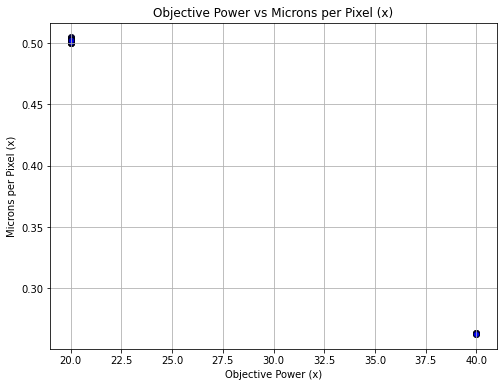

In [8]:
import openslide
import os
import matplotlib.pyplot as plt

def get_slide_metadata(wsi_path):
    try:
        wsi = openslide.OpenSlide(wsi_path)
        objective_power = wsi.properties.get("openslide.objective-power")
        mpp_x = wsi.properties.get("openslide.mpp-x")
        
        # Convert mpp_x to float if it's available
        if mpp_x is not None:
            mpp_x = float(mpp_x)
        
        return objective_power, mpp_x
    except openslide.OpenSlideError as e:
        print(f"Error opening slide {wsi_path}: {e}")
        return None, None

def plot_objective_vs_mpp(directory_path):
    objective_powers = []
    mpp_values = []
    
    # Loop through all slides in the directory
    for filename in os.listdir(directory_path):
        if filename.endswith(".svs") or filename.endswith(".tiff"):  # Adjust file extensions as needed
            slide_path = os.path.join(directory_path, filename)
            objective_power, mpp_x = get_slide_metadata(slide_path)
            
            # Check if both values were successfully retrieved
            if objective_power and mpp_x:
                try:
                    # Append values to lists
                    objective_powers.append(int(objective_power))
                    mpp_values.append(mpp_x)
                except ValueError:
                    print(f"Non-numeric objective power or mpp_x for {filename}")
    
    # Plotting
    plt.figure(figsize=(8, 6))
    plt.scatter(objective_powers, mpp_values, c='blue', alpha=0.6, edgecolors='k')
    plt.xlabel("Objective Power (x)")
    plt.ylabel("Microns per Pixel (x)")
    plt.title("Objective Power vs Microns per Pixel (x)")
    plt.grid(True)
    plt.show()

# Example usage
directory_path = '/tank/WSI_data/Ovarian_WSIs/MSK-IMPACT/hne/mskcc/'  # Replace with your directory path
plot_objective_vs_mpp(directory_path)